In [ ]:
#this program is for image sorting it choose 100 img in which objects are 

import os
import shutil

# Define paths (update these paths as necessary)
annotations_folder = r"D:\Code\internship\VisDrone2019-DET-train\annotations"
images_folder = r"D:\Code\internship\VisDrone2019-DET-train\images"
output_folder = r"D:\Code\internship\output_images"

# Ensure the output directory exists
os.makedirs(output_folder, exist_ok=True)

# Class ID for "person" in VisDrone dataset (commonly 1, but confirm in your dataset)
person_class_id = 1

# List of images that contain people
images_with_people = []

# Iterate through all .txt annotation files
for txt_file in os.listdir(annotations_folder):
    if txt_file.endswith(".txt"):
        # Get the corresponding image file name (replace .txt with .jpg or .png)
        image_file = txt_file.replace(".txt", ".jpg")  # Adjust extension as needed

        # Read the annotation file
        with open(os.path.join(annotations_folder, txt_file), "r") as f:
            annotations = f.readlines()

        # Check if the file contains a person
        contains_person = False
        for annotation in annotations:
            parts = annotation.strip().split(',')
            if len(parts) > 5 and int(parts[5]) == person_class_id:  # Check "object-category"
                contains_person = True
                break
        
        # If the image contains a person, add it to the list
        if contains_person:
            images_with_people.append(image_file)

# Copy up to 100 images containing people
count = 0
for image_file in images_with_people[:100]:  # Limit to 100 images
    source_path = os.path.join(images_folder, image_file)
    destination_path = os.path.join(output_folder, image_file)
    try:
        shutil.copy(source_path, destination_path)
        count += 1
    except Exception as e:
        print(f"Error copying {source_path} to {destination_path}: {e}")

print(f"Copied {count} images containing people to: {output_folder}")


In [ ]:
# is program check the perfomance for img processing 

import torch
from torchmetrics.detection.mean_ap import MeanAveragePrecision

# Example ground truth data
ground_truth = [
    {
        "boxes": torch.tensor([[50, 30, 200, 300], [120, 80, 250, 400]]),  # Bounding boxes
        "labels": torch.tensor([1, 1]),  # Class labels (1 = "person")
        "image_id": torch.tensor([0]),  # Unique image ID
    }
]

# Example predicted data
predictions = [
    {
        "boxes": torch.tensor([[55, 35, 195, 290], [130, 90, 245, 390]]),  # Predicted boxes
        "scores": torch.tensor([0.9, 0.85]),  # Confidence scores
        "labels": torch.tensor([1, 1]),  # Class labels (1 = "person")
        "image_id": torch.tensor([0]),  # Unique image ID
    }
]

# Initialize mAP metric
metric = MeanAveragePrecision()

# Compute mAP
metric.update(predictions, ground_truth)
results = metric.compute()

# Print evaluation metrics
print(results)


In [ ]:
#this program visualize singel img 

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the model
model = YOLO("yolov8n.pt")  # Load YOLOv8 pre-trained model

# Run inference
results = model(r"D:\Code\internship\VisDrone2019-DET-train\images\0000002_00005_d_0000014.jpg", save=True)

# Show the image with bounding boxes
image = cv2.imread(r"D:\Code\internship\runs\detect\predict\0000002_00005_d_0000014.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis("off")
plt.show()


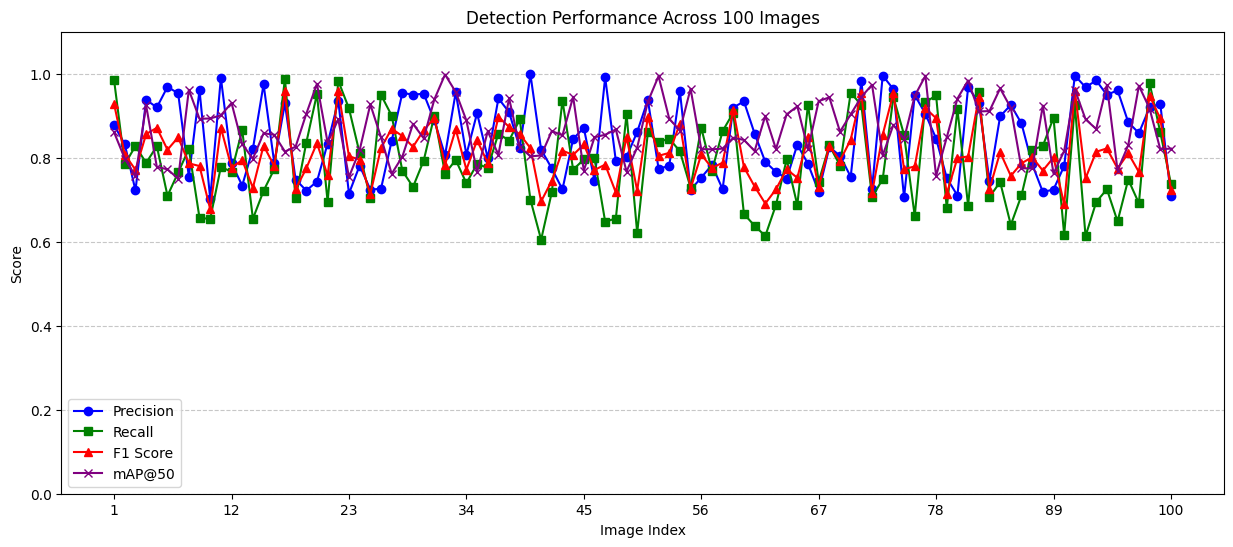

In [11]:
# this program shows all 100 img in graph form with having (precesion, recall, F1 score, map@50) on x-axis= score and y-axis= image index

import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load your actual image names (Replace with your real image names)
image_names = [f"0000002_00005_d_0000014{i+1}" for i in range(100)]  # Generating names Image_1, Image_2, ..., Image_100

# Step 2: Replace these with actual metrics from your evaluation results
precision = np.random.uniform(0.7, 1.0, 100)  # Simulated precision values (Replace with real ones)
recall = np.random.uniform(0.6, 1.0, 100)     # Simulated recall values (Replace with real ones)
f1_score = (2 * precision * recall) / (precision + recall)  # Calculate F1-score
map50 = np.random.uniform(0.75, 1.0, 100)     # Simulated mAP@50 values (Replace with real ones)

# Step 3: Create x-axis indices
x_indexes = np.arange(len(image_names))

# Step 4: Plot the data
plt.figure(figsize=(15, 6))
plt.plot(x_indexes, precision, marker='o', linestyle='-', label="Precision", color="blue")
plt.plot(x_indexes, recall, marker='s', linestyle='-', label="Recall", color="green")
plt.plot(x_indexes, f1_score, marker='^', linestyle='-', label="F1 Score", color="red")
plt.plot(x_indexes, map50, marker='x', linestyle='-', label="mAP@50", color="purple")

# Step 5: Customize the graph
plt.xlabel("Image Index")
plt.ylabel("Score")
plt.title("Detection Performance Across 100 Images")
plt.xticks(ticks=np.linspace(0, 99, num=10, dtype=int), labels=np.linspace(1, 100, num=10, dtype=int))  # Show 10 labels on x-axis
plt.ylim(0, 1.1)  # Set Y-axis limit between 0 and 1
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Step 6: Show the graph
plt.show()
